# Student spending habits

### Authors
Luca Mircea & Theo Trausan

### Date started
24 Mar 2024

### Premise
We have found a nice dataset on Kaggle (https://www.kaggle.com/datasets/sumanthnimmagadda/student-spending-dataset) that contains info on student spending habits. We thought this woud be a good dataset to play around with clustering & PCA to find groups and patterns

In [1]:
# we are taking inspiration and code from: 
# https://www.kaggle.com/code/prashant111/k-means-clustering-with-python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import sys
# !{sys.executable} -m pip install scikit-learn
# !{sys.executable} -m pip install kneed

In [2]:
students = pd.read_csv("student_spending.csv")

In [3]:
students.head(10)

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
5,5,25,Non-binary,Sophomore,Computer Science,523,790,3151,413,386,122,131,73,38,234,108,99,Mobile Payment App
6,6,23,Female,Freshman,Engineering,1354,69,4973,812,398,101,213,21,38,157,117,48,Credit/Debit Card
7,7,23,Female,Junior,Economics,631,748,3966,571,269,92,251,37,90,152,56,62,Mobile Payment App
8,8,22,Non-binary,Senior,Computer Science,1402,248,5638,599,354,82,155,123,41,162,172,194,Credit/Debit Card
9,9,18,Female,Junior,Computer Science,1423,74,3977,626,249,117,123,51,74,243,34,196,Mobile Payment App


In [4]:
# let's check the majors that exist in the dataset & see if we can turn this column into a few categories
students.major.value_counts()

major
Biology             228
Economics           204
Computer Science    192
Engineering         192
Psychology          184
Name: count, dtype: int64

<Axes: xlabel='major', ylabel='monthly_income'>

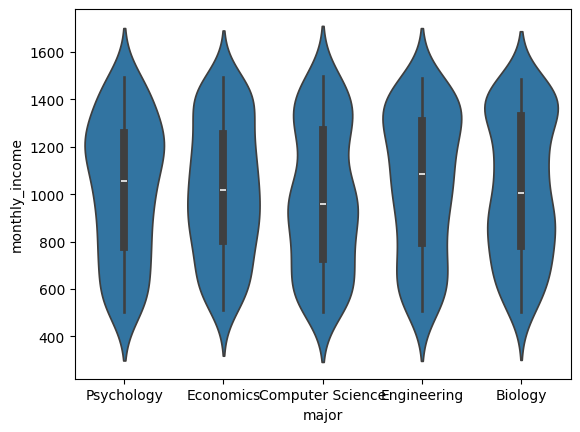

In [5]:
# the major seems like a natural cluster, so it's worth checking the differences at this step already
sns.violinplot(data=students, x="major", y="monthly_income")

In [6]:
# the engineers seem to be the richest, with biology split between rich & poor

In [7]:
# let's create a new dataframe to store the scaled variables

In [10]:
students.rename(inplace=True, columns={'Unnamed: 0': 'student_id'})

students_scaled = students[[
    'student_id', 'gender', 'year_in_school', 'major', 'preferred_payment_method'
]].copy()

In [11]:
list_of_columns_to_scale = [
    'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
    'transportation', 'books_supplies', 'entertainment', 'personal_care',
    'technology', 'health_wellness', 'miscellaneous'
]

for column in list_of_columns_to_scale:
    min_of_column = min(students[column])
    max_of_column = max(students[column])
    
    students_scaled[column + "_scaled"] = (students[column] - min_of_column) / (max_of_column - min_of_column)
    
    
students_scaled.head(10)

,student_id,gender,year_in_school,major,preferred_payment_method,monthly_income_scaled,financial_aid_scaled,tuition_scaled,housing_scaled,food_scaled,transportation_scaled,books_supplies_scaled,entertainment_scaled,personal_care_scaled,technology_scaled,health_wellness_scaled,miscellaneous_scaled
0,0,Non-binary,Freshman,Psychology,Credit/Debit Card,0.457457,0.270,0.979646,0.514190,0.653333,0.486667,0.552,0.161538,0.7250,0.336,0.570588,0.288889
1,1,Female,Junior,Economics,Credit/Debit Card,0.505506,0.875,0.635636,0.260434,0.883333,0.233333,0.808,0.415385,0.9000,0.704,0.582353,0.266667
2,2,Non-binary,Junior,Economics,Cash,0.233233,0.928,0.016016,0.442404,0.400000,0.580000,0.196,0.846154,0.0375,0.756,0.482353,0.627778
3,3,Female,Senior,Computer Science,Mobile Payment App,0.116116,0.265,0.644645,0.419032,0.630000,0.426667,0.692,0.607692,0.1250,0.452,0.441176,0.194444
4,4,Female,Senior,Computer Science,Credit/Debit Card,0.309309,0.522,0.294962,0.707846,0.906667,0.786667,0.576,0.215385,0.6375,0.152,0.241176,0.466667
5,5,Non-binary,Sophomore,Computer Science,Mobile Payment App,0.022022,0.790,0.049383,0.020033,0.953333,0.480000,0.324,0.407692,0.2250,0.736,0.458824,0.438889
6,6,Female,Freshman,Engineering,Credit/Debit Card,0.853854,0.069,0.657324,0.686144,0.993333,0.340000,0.652,0.007692,0.2250,0.428,0.511765,0.155556
7,7,Female,Junior,Economics,Mobile Payment App,0.130130,0.748,0.321321,0.283806,0.563333,0.280000,0.804,0.130769,0.8750,0.408,0.152941,0.233333
8,8,Non-binary,Senior,Computer Science,Credit/Debit Card,0.901902,0.248,0.879213,0.330551,0.846667,0.213333,0.420,0.792308,0.2625,0.448,0.835294,0.966667
9,9,Female,Junior,Computer Science,Mobile Payment App,0.922923,0.074,0.324992,0.375626,0.496667,0.446667,0.292,0.238462,0.6750,0.772,0.023529,0.977778


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

students_scaled['gender_encoded'] = le.fit_transform(students_scaled['gender'])
students_scaled['year_encoded'] = le.fit_transform(students_scaled['year_in_school'])
students_scaled['major_encoded'] = le.fit_transform(students_scaled['major'])
students_scaled['payment_method_encoded'] = le.fit_transform(students_scaled['preferred_payment_method'])

students_scaled.drop(columns=['gender', 'year_in_school','major', 'preferred_payment_method'], inplace=True)

students_scaled.head(5)

,student_id,monthly_income_scaled,financial_aid_scaled,tuition_scaled,housing_scaled,food_scaled,transportation_scaled,books_supplies_scaled,entertainment_scaled,personal_care_scaled,technology_scaled,health_wellness_scaled,miscellaneous_scaled,gender_encoded,year_encoded,major_encoded,payment_method_encoded
0,0,0.457457,0.270,0.979646,0.514190,0.653333,0.486667,0.552,0.161538,0.7250,0.336,0.570588,0.288889,2,0,4,1
1,1,0.505506,0.875,0.635636,0.260434,0.883333,0.233333,0.808,0.415385,0.9000,0.704,0.582353,0.266667,0,1,2,1
2,2,0.233233,0.928,0.016016,0.442404,0.400000,0.580000,0.196,0.846154,0.0375,0.756,0.482353,0.627778,2,1,2,0
3,3,0.116116,0.265,0.644645,0.419032,0.630000,0.426667,0.692,0.607692,0.1250,0.452,0.441176,0.194444,0,2,1,2
4,4,0.309309,0.522,0.294962,0.707846,0.906667,0.786667,0.576,0.215385,0.6375,0.152,0.241176,0.466667,0,2,1,1


In [18]:
# we have everything encoded & scaled, which means we're good to go & apply the clustering algorithm

from sklearn.cluster import KMeans

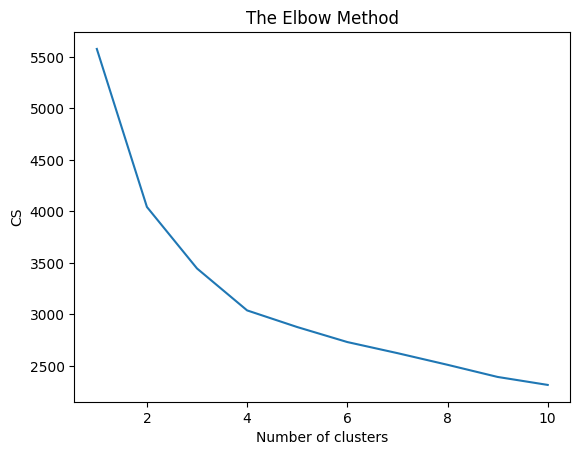

In [19]:
students_scaled_no_id_col = students_scaled.copy()
students_scaled_no_id_col.drop(columns=['student_id'], inplace=True)

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(students_scaled_no_id_col)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [22]:
# the plot above leaves things unclear, so we'll see what applying a formula yields

from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), cs, curve="convex", direction="decreasing"
)

kl.elbow

4

In [26]:
# according to the elbow method, it seems like we have 4 clusters; we'll check with the silhouette method next
from sklearn.metrics import silhouette_score

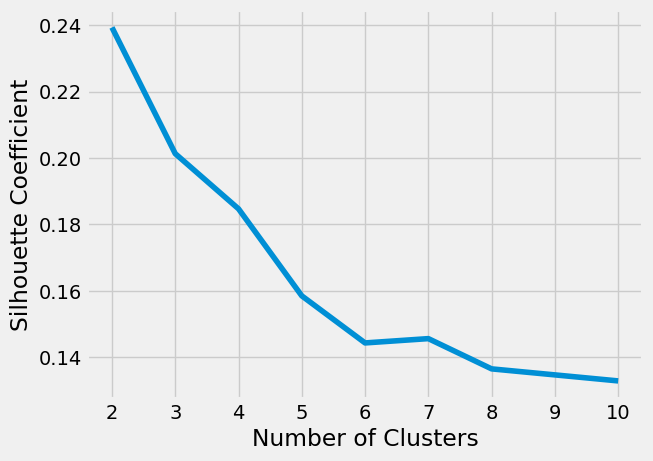

In [27]:
# A list holds the silhouette coefficients for each k
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(students_scaled_no_id_col)
    score = silhouette_score(students_scaled_no_id_col, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
# the silhouette method has not produced evidence that we have clusters; the elbow method graph is also unconvincing
# this suggests that we either have no clusters, or ill-defined clusters

# this is why PCA might be more appropriate for analyzing the differences between students